<h1 align='center'> 신호및시스템 기말고사</h1>

<h3 align='center'> 담당교수 : 박섭형</h3>

<p style="text-align: right"> 2021.6.17 (목)</p>

<div class="alert alert-block alert-info">
    
- 파일 이름에서 00000000을 자신의 학번으로, name을 자신의 이름으로 수정하세요.

- 다음 줄에 자신의 이름, 학번, 학과(전공)을 적으세요.

* 이름: 장윤제  &nbsp;&nbsp;          학번: 20175334   &nbsp;&nbsp;         학과(전공): 스마트IoT
    
</div>

- 주의 사항
  - 시험 시간 동안에는 카메라를 켜고 있어야 함
  - 시험 시간: 오전 11:00 ~ 오후 12:20 (1시간 20분)
  - 12:15부터 12:20 사이에 ipynb 파일을 upload 해야 함
  - 오후 12:20부터 동영상 녹화 시작
  - SmartLead에 문제 풀이 설명 동영상 녹화 파일 upload 마감 시간: 오후 13:00
  - 녹화를 시작하면 마스크를 착용한 학생들은 마스크를 살짝 내려서 얼굴을 확인하고 녹화 시작
  - 학번 이름을 말한 후에 설명 시작
  - 한 문제당 설명 시간이 3분을 넘지 말아야 함 (전체 9분 이내로 녹화)

**채점**

|문제 | 문제 1 | 문제 2-1 | 문제 2-2 | 문제 2-3 | 문제 2-4 | 문제 3-1 | 문제 3-2 | 문제 3-3 | 문제 3-4 | 합계 |
--|--|--|--|--|--|--|--|--|--|--
만점 | 20 | 5 | 5 | 15 | 15 | 10 | 10 | 10 |  10 | 100
점수 |  |  |  |  |  |  |  | | |


### 문제 1.

이산시간 신호 $\tilde{x}[n]$은 주기가 $N$인 주기 신호라고 가정하자.

$\tilde{x}[n]$의 이산 푸리에 급수 $\tilde{X}[k]$는 다음과 같이 정의된다.
$$\tilde{X}[k] = {\displaystyle \sum_{n=0}^{N-1} \tilde{x}[n] e^{-j\frac{2\pi}{N}nk}}, k=0, 1, \cdots, N-1.$$
그리고 역 이산 푸리에 급수는 다음과 같이 정의된다.
$$\tilde{x}[n] = {\displaystyle  \frac{1}{N} \sum_{k=0}^{N-1} \tilde{X}[k] e^{j\frac{2\pi}{N}kn}}, n=0, 1, \cdots, N-1.$$

이번 학기에 수업을 통해서 배운 내용을 중심으로 이 두 식의 물리적인 의미를 설명하라.

단, 인터넷을 검색해서 찾은 내용을 복사해서 붙여넣는 경우에 $-20$ 점으로 처리되니, 반드시 여러분의 언어로 아는 것을 설명해야 한다. 

**답**:

이산 푸리에 급수는 복소벡터 공간의 직교 정규 기저 벡터 ${\displaystyle W_N=e^{-j\frac{2\pi}{N}}}$ 에서 행렬x를 곱하여 더한 것을 말하며 역 이산 푸리에 급수는 신호를 이산 푸리에 급수로 변환한 신호를 다시 원래 신호로 바꿔준다.

### 문제 2.

'test_signal.wav' 파일을 일고, 다음 물음에 답하라.

#### 문제 2.1

이 신호를 만들 때 사용한 샘플링 주파수는 얼마인가?

In [30]:
import scipy.io.wavfile as wavfile

fs, wav = wavfile.read('test_signal.wav')
print(fs)

from IPython.display import Audio
Audio(wav, rate=fs)

4000


**답**: 4000Hz

#### 문제 2.2

이 신호의 길이는 몇 초에 해당하는지 답을 하고 그 이유를 설명하라.

In [6]:
wav.size / fs

2.5

**답**: 2.5초. sound data wav[n]의 샘플의 숫자를 샘플링 주파수로 나누면 시간이 나온다.

#### 문제 2.3

이 신호의 크기 스펙트럼을 화면에 표시하고, 이 스펙트럼으로부터 알 수 있는 사실을 아는대로 다 설명하라.

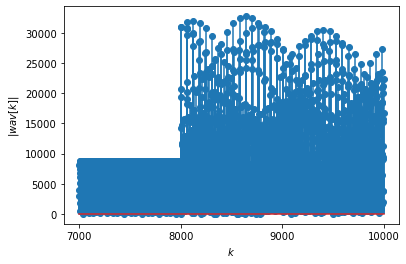

In [50]:
import matplotlib.pyplot as plt
import numpy as np

plt.stem(np.abs(wav[7000:]))
plt.xlabel("$k$")
plt.xticks([0,1000,2000,3000], [7000, 8000, 9000, 10000])
plt.ylabel("$|wav[k]|$") 
plt.show()

**답**: 여러 신호가 합쳐져 신호 wav가 만들어졌다. 약 wav[8000]부터 유효한 신호가 발현되었다.

#### 문제 2.4

이 신호의 스펙트로그램을 화면에 표시하고, 이 스펙트로그램으로부터 알 수 있는 사실을 아는대로 다 설명하라.

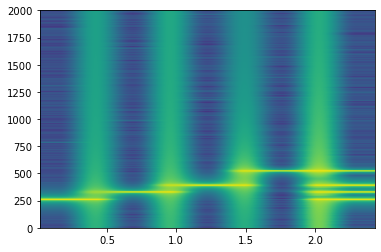

In [59]:
NFFT = 1200
length = wav.size - wav.size % NFFT
plt.specgram(wav[:], NFFT, fs)
plt.show()

**설명**: 음이 변화할 때 마다 파형이 바뀌고 약 2초부터는 여러개의 음이 같이 출력된다.

### 문제 3.

어느 이산시간 선형 시불변 시스템에 임펄스 신호 $\delta[n]$을 입력했을 때 다음과 같은 신호가 출력된다.
$$
a[n] = \begin{cases}
1/4 & n = 0 \\
1/2 & n = 1 \\
1/4 & n = 2 \\
0 & \mathrm{otherwise}
\end{cases}
$$

다음 물음에 답하라.

#### 문제 3.1

이 선형 시불변 시스템의 임펄스 응답 $h[n]$은 얼마인지 구하고, 그 이유를 설명하라.

**답**: $h[n] = \Sigma^{M}_{k=0} b_k\delta[n-k] = b_n, n=0,1,2,..,M$  otherwise 0

h = [1/4,1/2,1/4]

#### 문제 3.2

이 선형 시불변 시스템에 다음 신호 $x[n]$이 입력될 때의 출력 $y[n]$을 구하는 과정을 표를 이용해서 설명하라.
$$x[n] = \begin{cases}
2& n=0\\
3& n=1\\
-1& n=2\\
0& \mathrm{otherwise}
\end{cases}$$

**답**:

|$n$| 0 | 1| 2| 3|4|5|6|
|--|--|--|--|--|--|--|--
|$h[n]$|1/4|1/2|1/4|||||
|$x[n]$|2|3|-1|||||
|$x[0]h[n]$|2(1/4)|2(1/2)|2(1/4)|||||
|$x[1]h[n-1]$||3(1/4)|3(1/2)|3(1/4)||||
|$x[2]h[n-2]$|||(-1)(1/4)|(-1)(1/2)|(-1)(1/4)|||
|$y[n]$|1/2|7/4|7/4|1/4|-1/4|||


#### 문제 3.3

Python을 이용해서 문제 3.2에서 구한 답을 구하라.


In [55]:
x = np.array([2, 3, -1])
h = np.array([1,2,1])/4
y = np.convolve(x,h)
y

array([ 0.5 ,  1.75,  1.75,  0.25, -0.25])

#### 문제 3.4

이 이산시간 선형 시불변 시스템의 주파수 크기 응답의 그래프를 그려라.


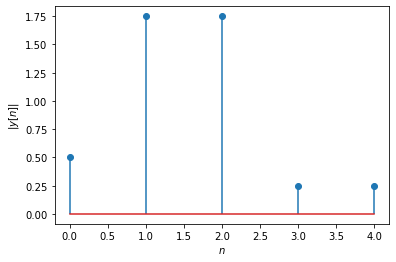

In [57]:
plt.stem(np.abs(y))
plt.xlabel("$n$")
plt.ylabel("$|y[n]|$")
plt.show()